# Assignment 1: k-nearest neighbors (100 points)

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

==> *Write*
* *names* Srinivas Kumar Ramdas, Benedikt Riegel, Fozan Gill 
* *matr. nr.* 
* *study program* Computer Science
* *B.Sc./M.Sc.* M.Sc.

*of all assignment group participants here.* (double klick here to edit)*

In [3]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np


def load_wine_dataset():
    from sklearn import datasets
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    return X, y
    
X, y = load_wine_dataset()


## Task 1: Visualization and Preprocessing (25 points)

1) *(5 Points)* Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: [http://archive.ics.uci.edu/ml/datasets/Wine).


The dataset contains result of chemical analysis of wines grown in the same region in Italy, but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. SOme of the input features are: 1) Alchohol, 2) Malic Acid , 3) Ash, 4) Alcalinity Of Ash etc, the goal is to use chemical analysis to determine the origin of wines. 

2) *(5 Points)* Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [22]:
# Implement your solution here.
print("The number of samples are:")
print(len(X))

print("THe number of samples per class are: ")
value, counts = np.unique(y, return_counts=True)
print(dict(zip(value, counts)))

print("The Std deviation and mean of each feature are:")
print(np.std(X, axis=0))
print(np.mean(X, axis=0))

The number of samples are:
178
THe number of samples per class are: 
{0: 59, 1: 71, 2: 48}
The Std deviation and mean of each feature are:
[8.09542915e-01 1.11400363e+00 2.73572294e-01 3.33016976e+00
 1.42423077e+01 6.24090564e-01 9.96048950e-01 1.24103260e-01
 5.70748849e-01 2.31176466e+00 2.27928607e-01 7.07993265e-01
 3.14021657e+02]
[1.30006180e+01 2.33634831e+00 2.36651685e+00 1.94949438e+01
 9.97415730e+01 2.29511236e+00 2.02926966e+00 3.61853933e-01
 1.59089888e+00 5.05808988e+00 9.57449438e-01 2.61168539e+00
 7.46893258e+02]


3) *(5 Points)* Visualize the variables *alcohol* and *magnesium* in a scatter plot (*alcohol* on the x-axis, *magnesium* on the y-axis). Color each point of the plot according to its class.

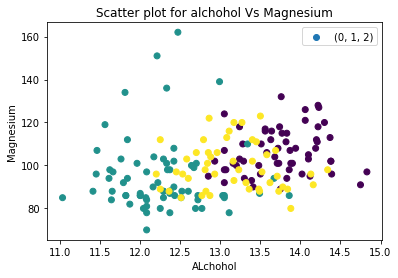

In [40]:
# Implement your solution here.
#print(X[ :, 0 ])
#print(X[:, 4 ])

plt.scatter(X[ :, 0], X[ :, 4], c=y.astype(int), label=(0, 1, 2))
plt.title("Scatter plot for alchohol Vs Magnesium")
plt.xlabel("ALchohol")
plt.ylabel("Magnesium")
plt.legend(numpoints=1)

plt.show()

4) *(5 Points)* Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [49]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    train_size = int(0.7*len(X))
    test_size = len(X) - train_size
    
    training_idx = np.random.randint(X.shape[0], size=train_size)
    test_idx = np.random.randint(X.shape[0], size=test_size)

    return X[training_idx,:], X[test_idx,:], y[training_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y)

#print(X_train)
#print(X_test)
assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

5) *(5 Points)* kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [55]:
# Implement your solution here
max_values = np.max(X_train, axis=0)
min_values = np.min(X_train, axis=0)
X_train = (X_train - min_values)/(max_values - min_values)
X_test = (X_test - min_values)/(max_values - min_values)



## Task 2: k-nearest neighbors (50 Points)
*Choose classes randomly if weights are equal for multiple classes*

**For B.Sc. Data Science:**  

Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighbors`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `weights`, which is provided as a field in the kNN class.

**For all students other than B.Sc. Data Science:**

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [75]:
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def get_neighbours(self, x_test):
        """
        """
        distances = list()
        for ind, x_train in enumerate(self.X):
            dist = euclidean_distance(x_train, x_test)
            distances.append((self.y[ind], dist))
        
        distances.sort(key=lambda x_train_dist:  x_train_dist[1])
        
        neighbours = list()
        
        for ind in range(self.k):
            neighbours.append(distances[ind])
        
        return neighbours
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        # Implement your solution here.
        
        results = np.array([])
        
        for x_test in X:
            neighbours = self.get_neighbours(x_test)
            if self.weights == 'uniform':
                neighbour_classes = [neighbour[0] for neighbour in neighbours]
                #print(neighbour_classes)
                class_counts = np.bincount(neighbour_classes)
                #print(class_counts)
                #print( np.argmax(class_counts))
                results = np.append(results, [np.argmax(class_counts)])
            else:
                freq = np.zeros(3)
                for neighbour in neighbours:
                    #print(neighbour)
                    freq[neighbour[0]] += (1/ neighbour[1])
                results = np.append(results, [np.argmax(freq)])
        #print(results)
        return results
            
        

    
def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))



#print(len(X_test))

54


<ipython-input-75-bc3ec9247bbc>:52: RuntimeWarning: divide by zero encountered in double_scalars
  freq[neighbour[0]] += (1/ neighbour[1])


## Task 3: Evaluation (25 Points)

1) *(10 Points)* Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score. It is advisable to implement a function for the confusion matrix and reuse it.

In [82]:
def get_confusion_matrix_metrics(y_pred, y_true):
    TP = np.sum(np.logical_and(y_pred == True, y_true == True))
    
    TN = np.sum(np.logical_and(y_pred == False, y_true == False))
    
    FP = np.sum(np.logical_and(y_pred == True, y_true == False))
    
    FN = np.sum(np.logical_and(y_pred == False, y_true == True))
    
    return TP, TN, FP, FN

def precision(y_pred, y_true):
    # Implement your solution here.
    TP, TN, FP, FN = get_confusion_matrix_metrics(y_pred, y_true)
    return TP/(TP + FP)

def recall(y_pred, y_true):
    # Implement your solution here.
    TP, TN, FP, FN = get_confusion_matrix_metrics(y_pred, y_true)
    return TP/(TP + FN)

def f1score(y_pred, y_true):
    # Implement your solution here.
    precision1 = precision(y_pred, y_true)
    recall1 = recall(y_pred, y_true)
    
    return (2*precision1*recall1)/(precision1 + recall1)

2) *(10 Points)* Evaluate the performance of kNN with uniform weighting on the Wine dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

**For all students other than B.Sc. Data Science:** 

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

In [83]:
# Implement your solution here.
k_values = [1, 5, 9]

for k in k_values:
    knn = KNearestNeighbors(k, weights="uniform")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    y_true_0 = (y_test == 0)
    y_pred_0 = (y_pred == 0)

    y_true_1 = (y_test == 1)
    y_pred_1 = (y_pred == 1)

    y_true_2 = (y_test == 2)
    y_pred_2 = (y_pred == 2)

    f1score(y_pred_0, y_true_0)

0.9142857142857143

==> *Write your observations here and report your results.* (double klick here to edit)

3) *(5 Points)* Explain why kNN with `k=1` achieves perfect results on the training data. Why is it not the best model?

    ==> At K=1 We get highest accuracy and 100% result. It is not the best model because it is inefficient during classification and does not generate explicit knowledge about classes. Too small value of "K" leads to too little generalization which means high sensitivity reagrding outliers and too large "K" leads to too much generalization.